In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keila_wrangle as w

# Wrangle

In [2]:
# get dataset
df = w.read_wine()

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  red_wine wine_type quality_type  
0      9.4        5         1       red          low  
1      9.8        5         1       red          low  
2      9.8        5         1       red          low  
3      9.8        6         1       red         high  
4      9.4        5         1       red          low

In [4]:
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
red_wine              6497.0    0.246114   0.430779  0.00000   0.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
red_wine                0.00000    0.00000    1.00000

In [5]:
# cleaning data
train, validate, test = w.clean_wine()

In [6]:
# found no nulls 
df[df.isnull()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
red_wine                0.0
wine_type                 0
quality_type              0
dtype: object

SUMMARY REPORT
          
          
Dataframe head: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  red_wine wine_type quality_type  
0      9.4        5         1       red          low  
1      9.8        5         1       red          low  
2      9.8        5         1       red          low  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 

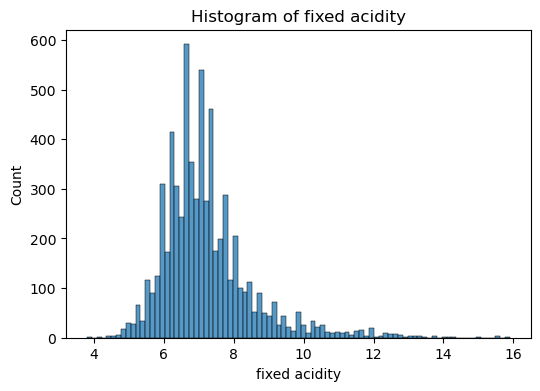

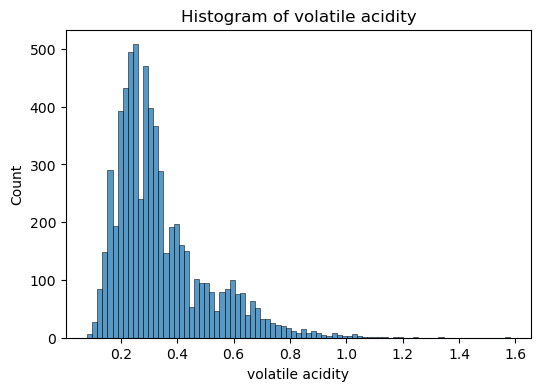

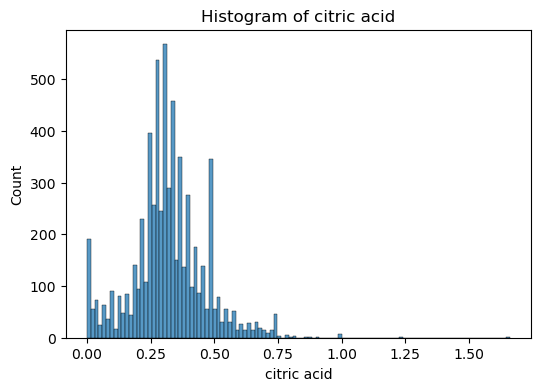

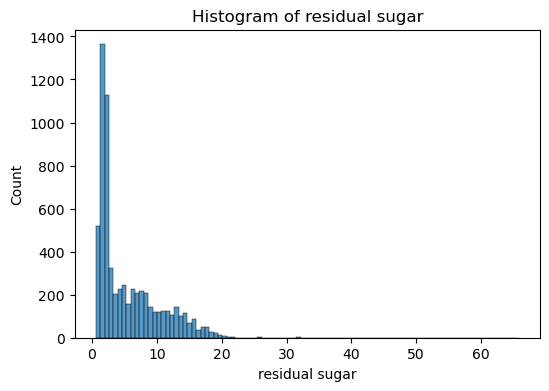

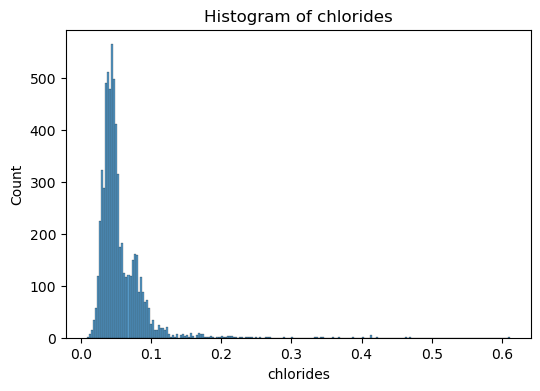

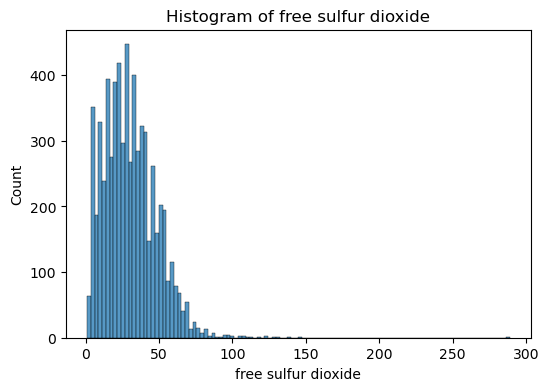

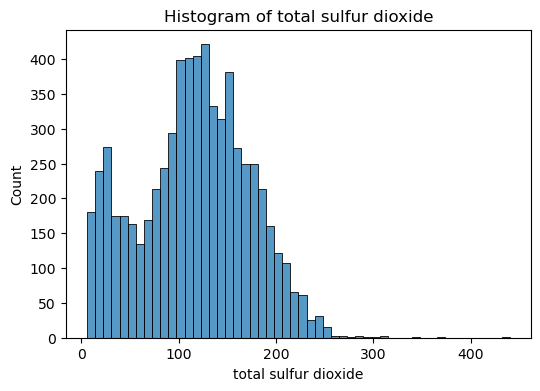

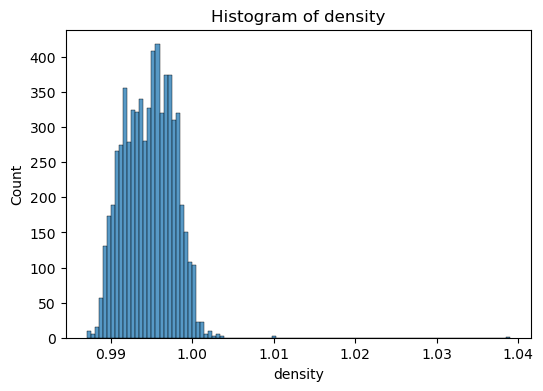

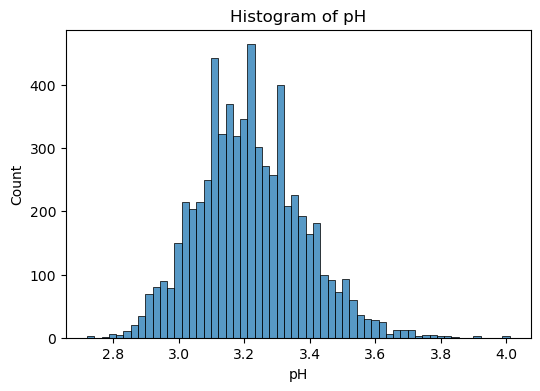

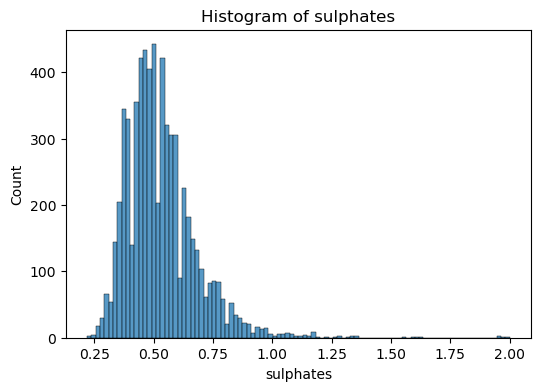

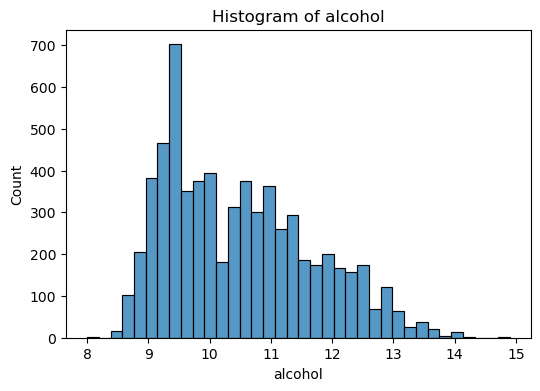

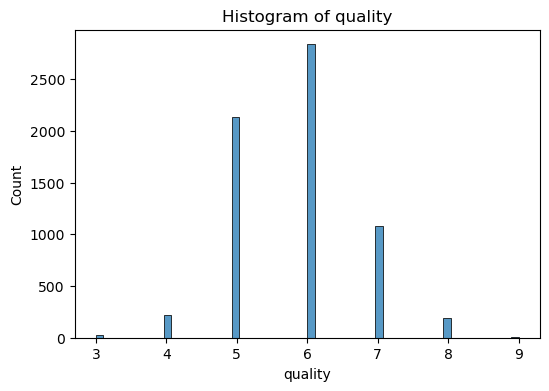

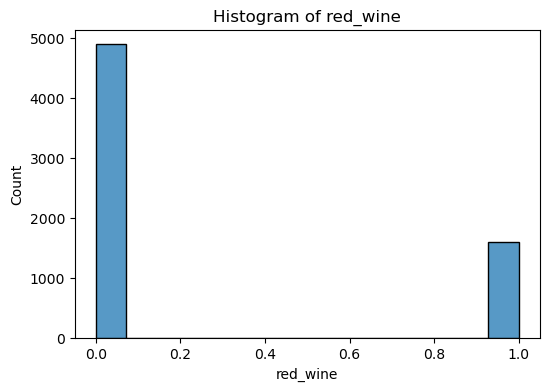

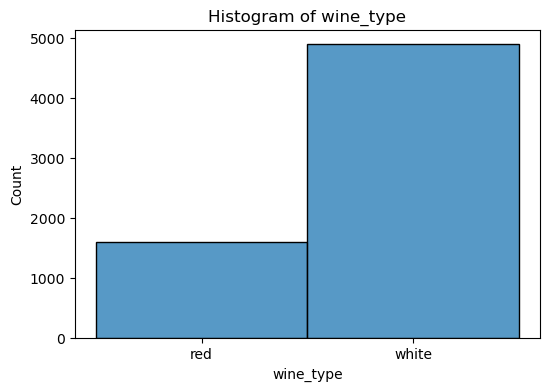

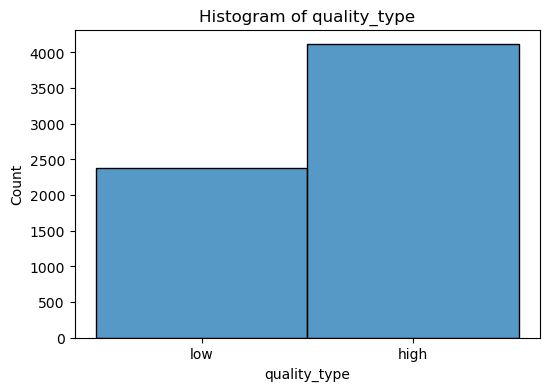

In [7]:
w.summarize(df)

In [8]:
# splitting into x and y
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3551, 15)
validate -> (1184, 15)
test -> (1184, 15)


In [9]:
# scaling data
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

In [10]:
x_train_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.761194          0.173333     0.643836        0.032000   0.200000   
1          0.328358          0.373333     0.383562        0.288000   0.125926   
2          0.462687          0.253333     0.493151        0.336000   0.177778   
3          0.432836          0.346667     0.287671        0.133333   0.281481   
4          0.447761          0.293333     0.671233        0.400000   0.318519   
...             ...               ...          ...             ...        ...   
3546       0.283582          0.626667     0.616438        0.656000   0.259259   
3547       0.626866          0.133333     0.493151        0.058667   0.207407   
3548       0.388060          0.293333     0.383562        0.080000   0.222222   
3549       0.253731          0.306667     0.465753        0.112000   0.222222   
3550       0.328358          0.226667     0.465753        0.122667   0.311111   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0                0.243902              0.428044  0.566904  0.122222   
1                0.134146              0.317343  0.220427  0.444444   
2                0.536585              0.579336  0.437621  0.266667   
3                0.158537              0.476015  0.418229  0.511111   
4                0.585366              0.667897  0.663866  0.811111   
...                   ...                   ...       ...       ...   
3546             0.390244              0.645756  0.663866  0.455556   
3547             0.280488              0.664207  0.547511  0.511111   
3548             0.243902              0.627306  0.292825  0.455556   
3549             0.713415              0.571956  0.301228  0.533333   
3550             0.256098              0.494465  0.404008  0.522222   

      sulphates   alcohol  red_wine  
0      0.583333  0.194690       0.0  
1      0.069444  0.778761       0.0  
2      0.152778  0.460177       0.0  
3      0.305556  0.318584       0.0  
4      0.500000  0.230088       0.0  
...         ...       ...       ...  
3546   0.333333  0.141593       0.0  
3547   0.458333  0.194690       0.0  
3548   0.486111  0.530973       0.0  
3549   0.347222  0.424779       0.0  
3550   0.347222  0.353982       0.0  

[3551 rows x 12 columns]

* sulphates, density, total sulfur dioxide, free sulfur dioxide, chlorides, residual sugar, citric acid, volatile acidity   has outliers

In [11]:
train, validate, test = w.clean_wine()

In [12]:
target = "quality_type"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3551, 15)
validate -> (1184, 15)
test -> (1184, 15)


In [13]:
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)


In [14]:
x_train_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.761194          0.173333     0.643836        0.032000   0.200000   
1          0.328358          0.373333     0.383562        0.288000   0.125926   
2          0.462687          0.253333     0.493151        0.336000   0.177778   
3          0.432836          0.346667     0.287671        0.133333   0.281481   
4          0.447761          0.293333     0.671233        0.400000   0.318519   
...             ...               ...          ...             ...        ...   
3546       0.283582          0.626667     0.616438        0.656000   0.259259   
3547       0.626866          0.133333     0.493151        0.058667   0.207407   
3548       0.388060          0.293333     0.383562        0.080000   0.222222   
3549       0.253731          0.306667     0.465753        0.112000   0.222222   
3550       0.328358          0.226667     0.465753        0.122667   0.311111   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0                0.243902              0.428044  0.566904  0.122222   
1                0.134146              0.317343  0.220427  0.444444   
2                0.536585              0.579336  0.437621  0.266667   
3                0.158537              0.476015  0.418229  0.511111   
4                0.585366              0.667897  0.663866  0.811111   
...                   ...                   ...       ...       ...   
3546             0.390244              0.645756  0.663866  0.455556   
3547             0.280488              0.664207  0.547511  0.511111   
3548             0.243902              0.627306  0.292825  0.455556   
3549             0.713415              0.571956  0.301228  0.533333   
3550             0.256098              0.494465  0.404008  0.522222   

      sulphates   alcohol  red_wine  
0      0.583333  0.194690       0.0  
1      0.069444  0.778761       0.0  
2      0.152778  0.460177       0.0  
3      0.305556  0.318584       0.0  
4      0.500000  0.230088       0.0  
...         ...       ...       ...  
3546   0.333333  0.141593       0.0  
3547   0.458333  0.194690       0.0  
3548   0.486111  0.530973       0.0  
3549   0.347222  0.424779       0.0  
3550   0.347222  0.353982       0.0  

[3551 rows x 12 columns]

# Exploration

In [15]:
target_var = 'quality'
feat_vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','ph','alcohol','red_wine']
def plot_correlations(df, target_var, feat_vars):
    # Calculate correlations between feature variables and target variable
    correlations = df[feat_vars].corrwith(df[target_var]).sort_values()
   # Create a bar chart to visualize correlations
    plt.figure(figsize=(10,6))
    plt.barh(correlations.index, correlations.values)
    plt.xlabel('Target Variable')
    plt.title('Feature Variable Correlations with Target Variable')
    plt.show()

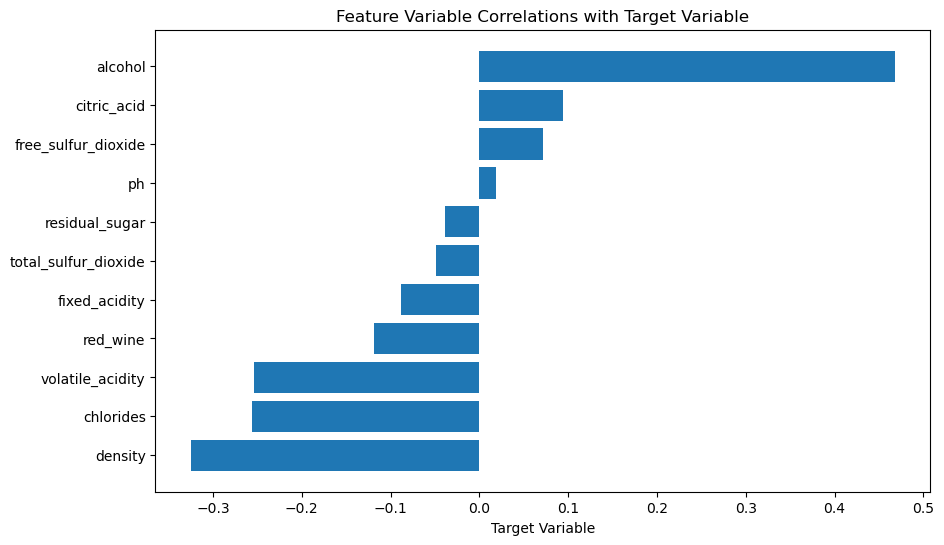

In [16]:
plot_correlations(train,target_var,feat_vars)

In [17]:
def plot_continuous_target(y):
    "Function to plot target variable"
   
    # Plot the continuous target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=5,histtype='bar')
    plt.xlabel('Target Variable')
    plt.ylabel('Frequency')
    plt.title('Distribution of Continuous Target Variable')
    plt.show()

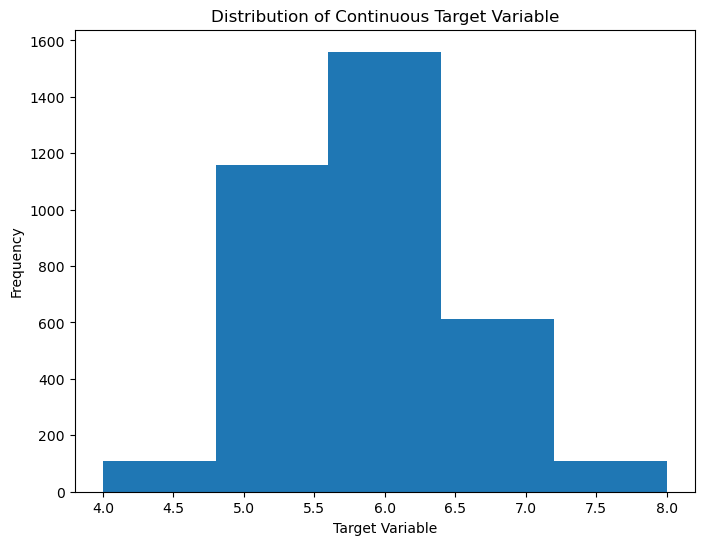

In [18]:
plot_continuous_target(train.quality)

In [19]:
cat_var = 'quality_type'
cont_var = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','ph','alcohol']
hue='red_wine'
def plot_categorical_and_continuous_vars(df, cat_var, cont_var,hue):
    for var in cont_var:
        # Create a box plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=cat_var, y=var, data=df, hue=hue)
        plt.axhline(y=df[var].mean(), color='r', linestyle='--')
        plt.xlabel(cat_var)
        plt.ylabel(var)
        plt.title(f'{cat_var} vs. {var}')
        plt.show()

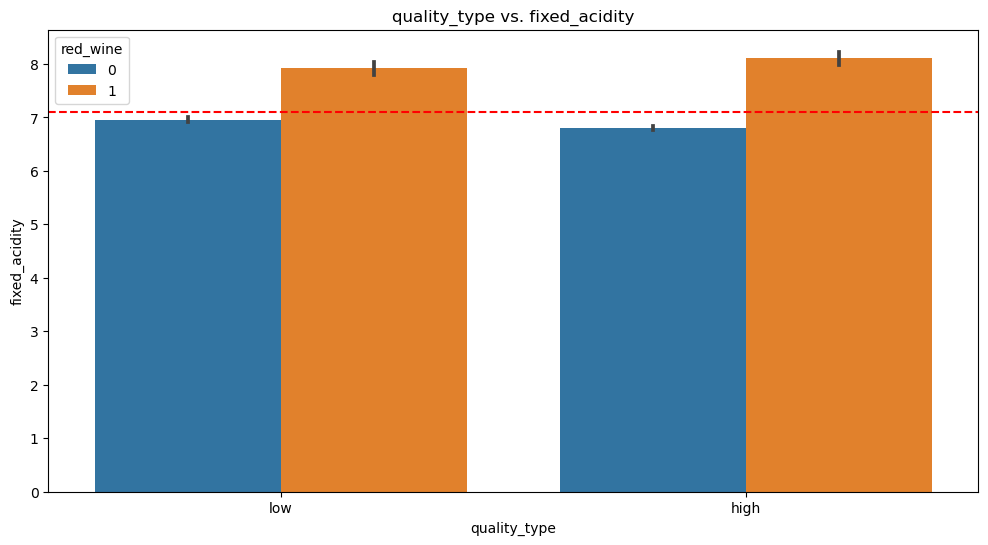

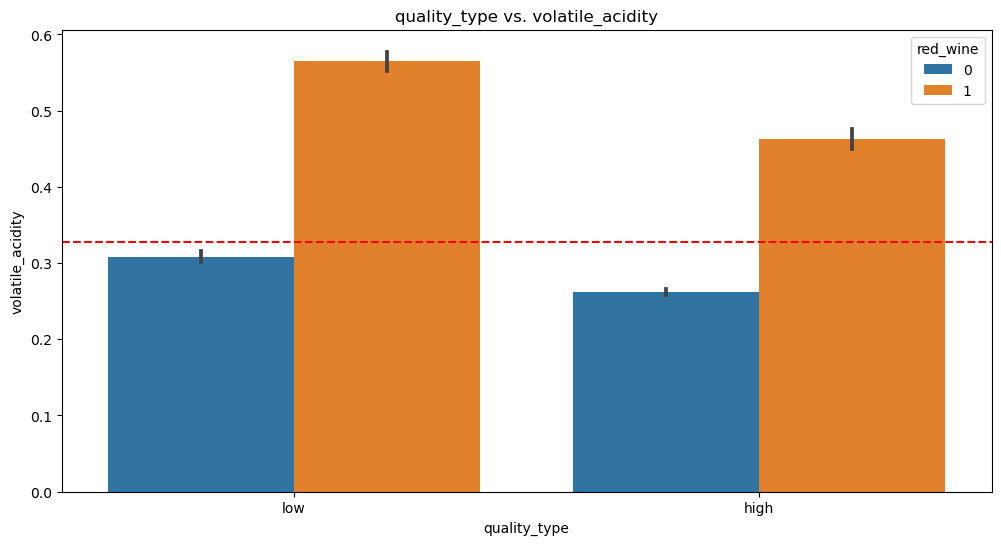

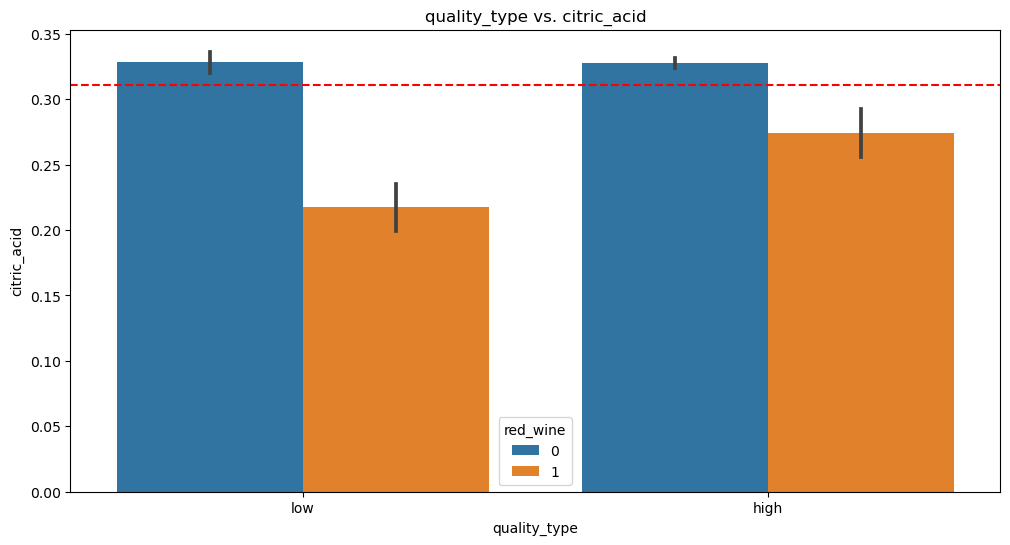

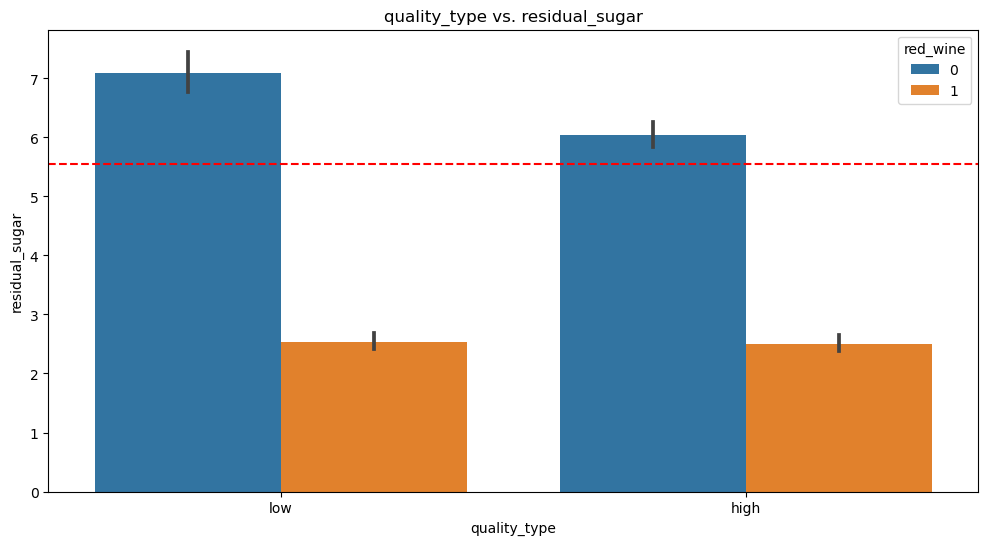

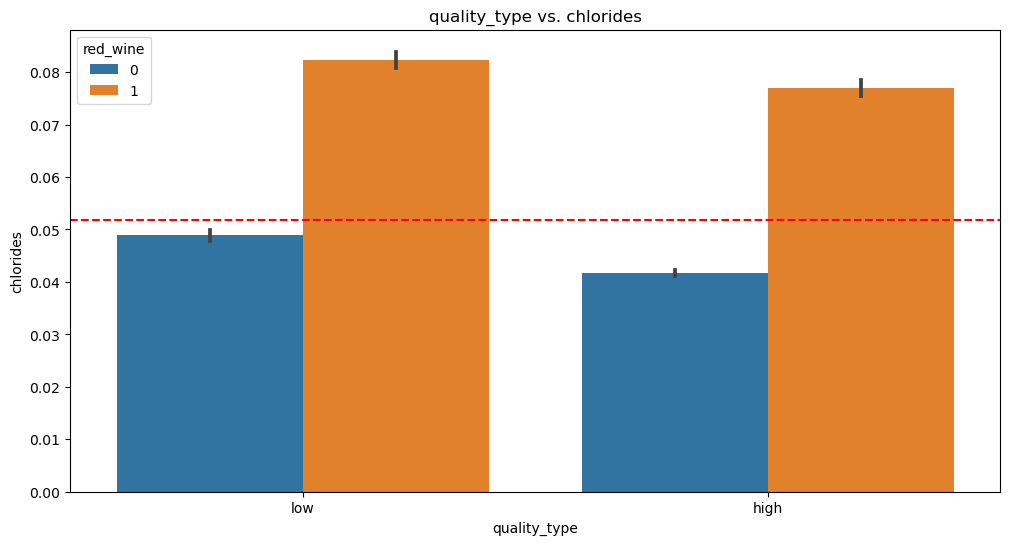

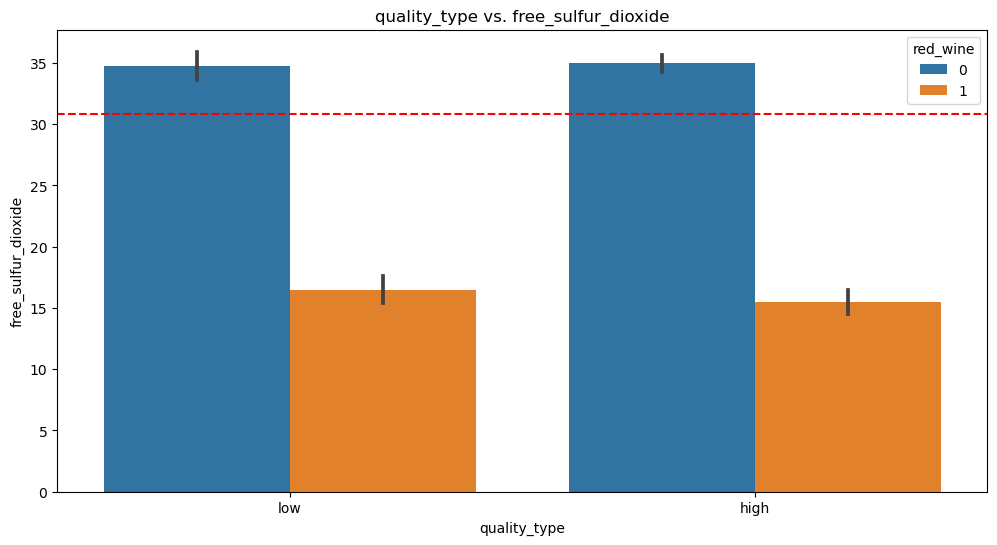

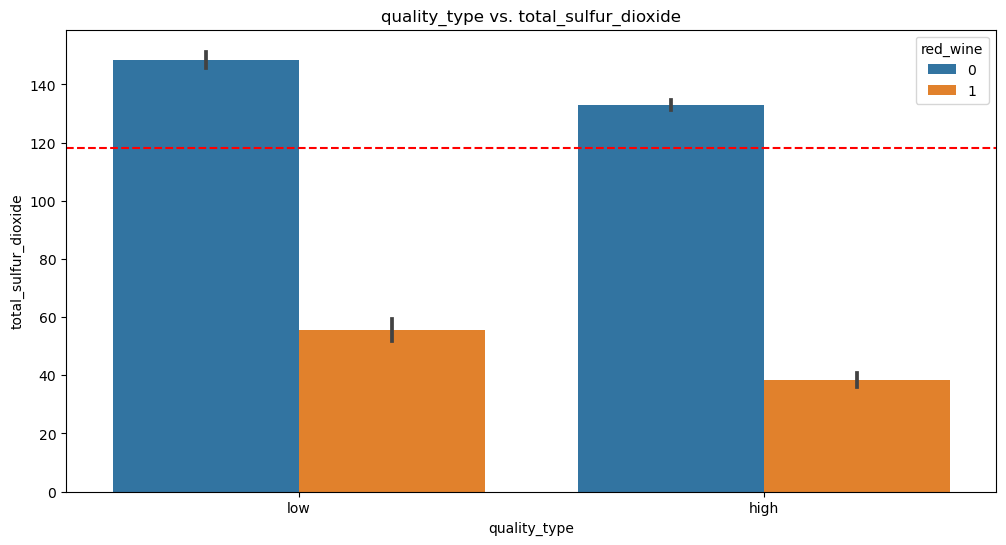

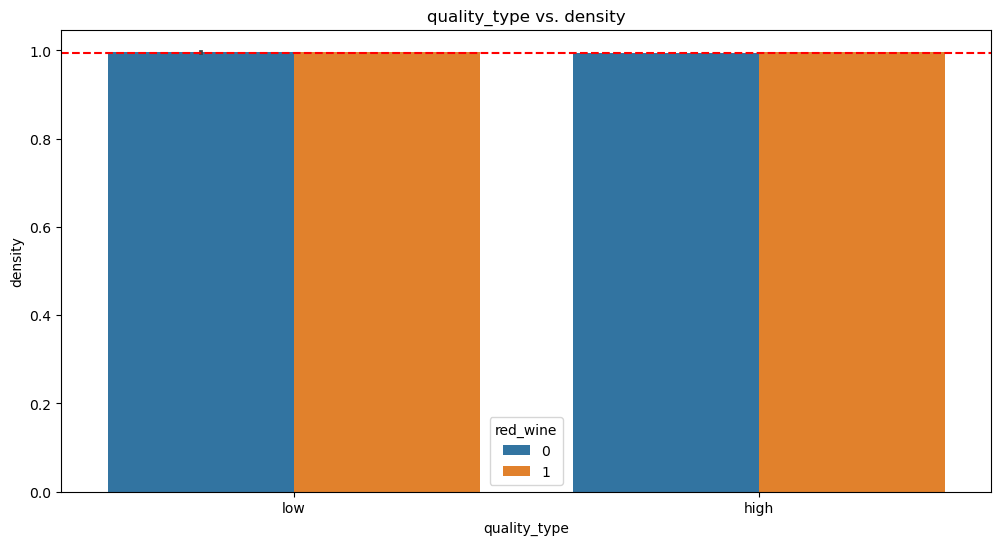

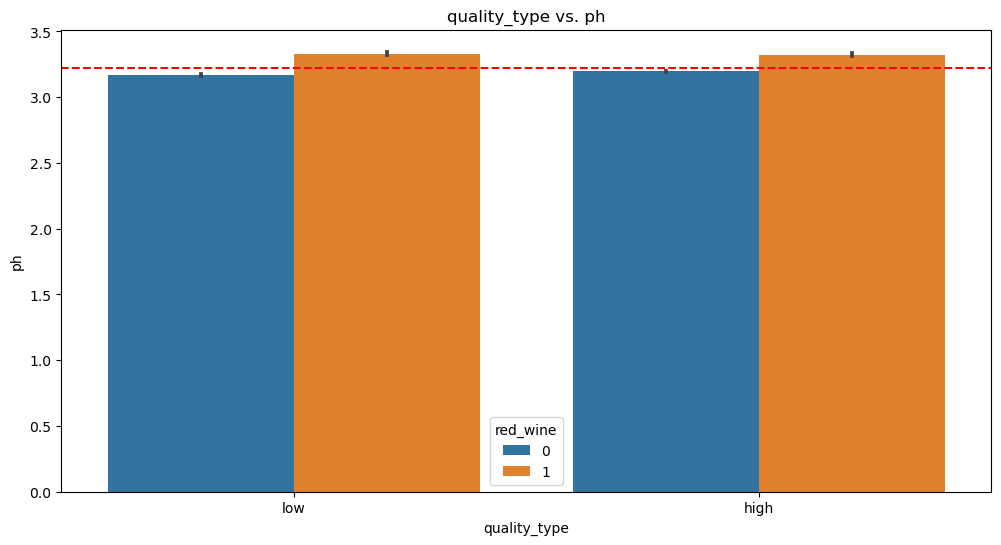

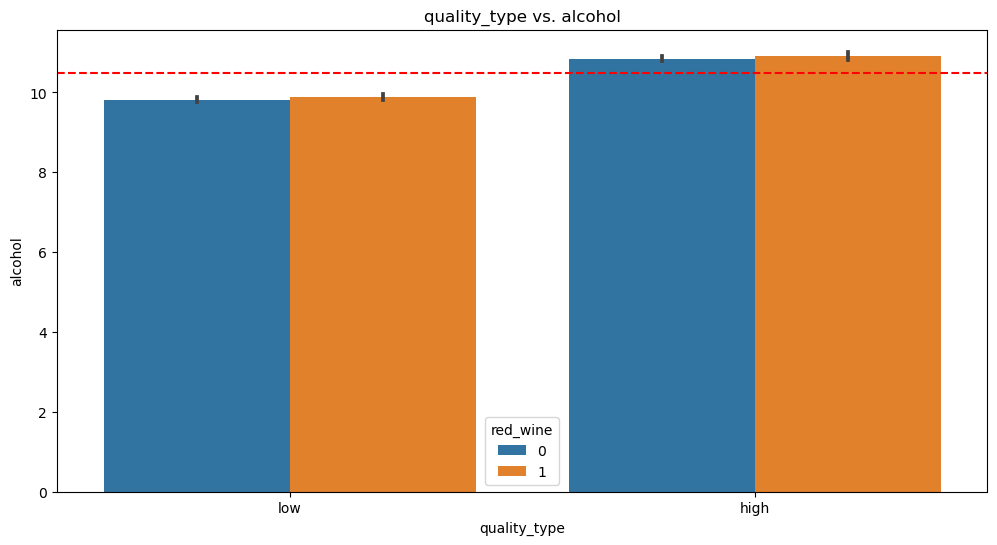

In [20]:
plot_categorical_and_continuous_vars(train, cat_var, cont_var,hue)

In [21]:
train_white_wine=train[train.red_wine==0]

In [22]:
train_red_wine=train[train.red_wine==1]

In [23]:
from sklearn.linear_model import LinearRegression, LassoLarsCV
import scipy.stats as stats
def statistical_tests_cont_cat(variable_continuous, variable_categorical, alpha=0.05):
    # Perform t-test or Mann-Whitney U test based on the number of categories in the categorical variable
    unique_categories = variable_categorical.unique()
    num_categories = len(unique_categories)

    if num_categories == 2:
        category1 = variable_continuous[variable_categorical == unique_categories[0]]
        category2 = variable_continuous[variable_categorical == unique_categories[1]]

        t_statistic, p_value = stats.ttest_ind(category1, category2)
        test_type = "T-Test"
    else:
        categories = [variable_continuous[variable_categorical == category] for category in unique_categories]
        statistic, p_value = stats.kruskal(*categories)
        t_statistic = statistic
        test_type = "Kruskal-Wallis Test"

    print(f"{test_type} Results:")
    print(f"Test Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")

    if p_value < alpha:
        print("We reject the null hypothesis.")
    else:
        print("We fail to reject the null hypothesis.")

    # Perform ANOVA or Kruskal-Wallis test based on the number of categories in the categorical variable
    if num_categories > 2:
        if num_categories <= 10:  # Perform ANOVA test
            groups = [variable_continuous[variable_categorical == category] for category in unique_categories]
            f_statistic, p_value = stats.f_oneway(*groups)
            test_type = "ANOVA"
        else:  # Perform Kruskal-Wallis test
            groups = [variable_continuous[variable_categorical == category] for category in unique_categories]
            statistic, p_value = stats.kruskal(*groups)
            f_statistic = statistic
            test_type = "Kruskal-Wallis Test"

        print(f"\n{test_type} Results:")
        print(f"Test Statistic: {f_statistic}")
        print(f"P-Value: {p_value}")

        if p_value < alpha:
            print("We reject the null hypothesis.")
        else:
            print("We fail to reject the null hypothesis.")

In [24]:
def chi_square_test(variable1, variable2, alpha=0.05):
    "This function calculates the chi-square test for two categorical variables and prints out the results."
    observed = pd.crosstab(variable1, variable2)
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    
    print("Observed Contingency Table:")
    print(observed)
    print("Expected Contingency Table:")
    print(expected)
    print("Chi-Square Test Statistic:")
    print(chi2)
    print("p-value:")
    print(p)
    
    if p < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to reject the null hypothesis.')


# Hypotheses:

## 1. Does alcohol affects the quality of the Wine?

H_$0$ : Alcohol has no correlation with the quality of the wine.
  
H_$A$: Alcohol has a correlation with the quality of the wine.

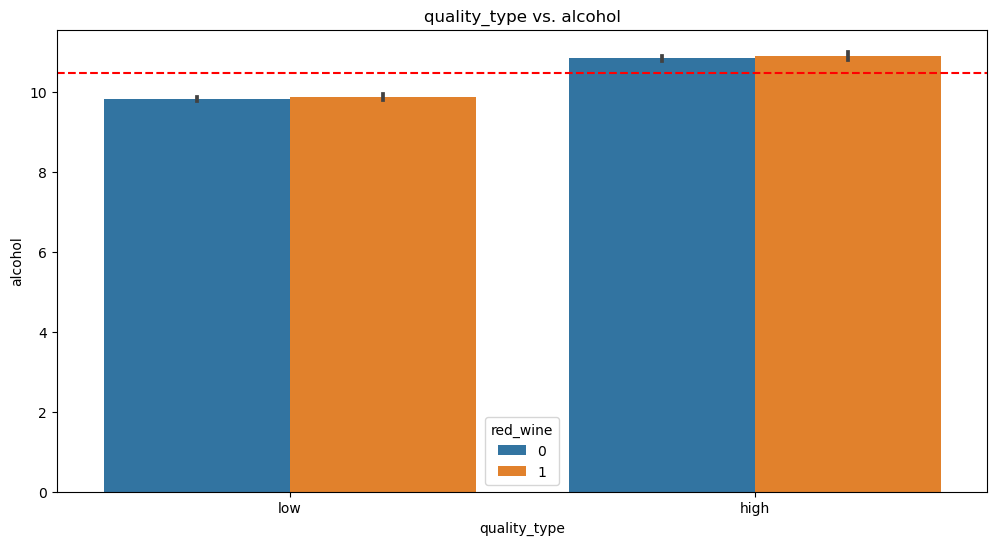

In [25]:
cat_var = 'quality_type'
cont_var = ['alcohol']
hue='red_wine'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [26]:
statistical_tests_cont_cat(train.alcohol,train.quality_type)

T-Test Results:
Test Statistic: -26.91755322776039
P-Value: 2.18355881069506e-145
We reject the null hypothesis.


## 2. Does ph affects the quality of the wine?

H_$0$ : Ph has no correlation with the quality of the wine.
  
H_$A$: Ph has a correlation with the quality of the wine.

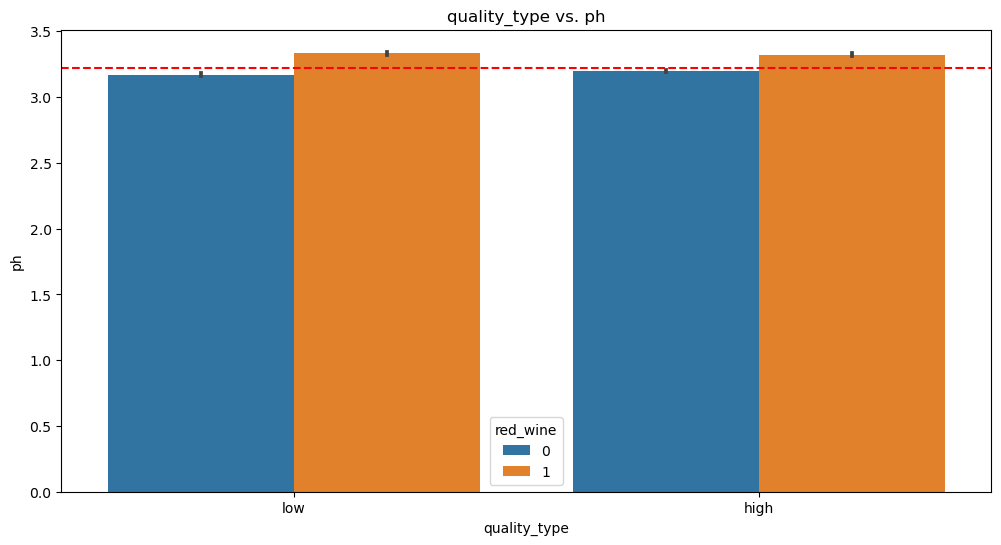

In [27]:
cat_var = 'quality_type'
cont_var = ['ph']
hue='red_wine'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [28]:
statistical_tests_cont_cat(train.ph,train.quality_type)

T-Test Results:
Test Statistic: -0.41018399347563544
P-Value: 0.6816957409422995
We fail to reject the null hypothesis.


In [29]:
statistical_tests_cont_cat(train.ph,train.quality)

Kruskal-Wallis Test Results:
Test Statistic: 4.533545726858705
P-Value: 0.33858833595465854
We fail to reject the null hypothesis.

ANOVA Results:
Test Statistic: 0.6686592752845311
P-Value: 0.6137046877464833
We fail to reject the null hypothesis.


## 3. Does chloride content affects the quality of the wine?

H_$0$ : Chloride has no correlation with the quality of the wine.
  
H_$A$: Chloride has a correlation with the quality of the wine.

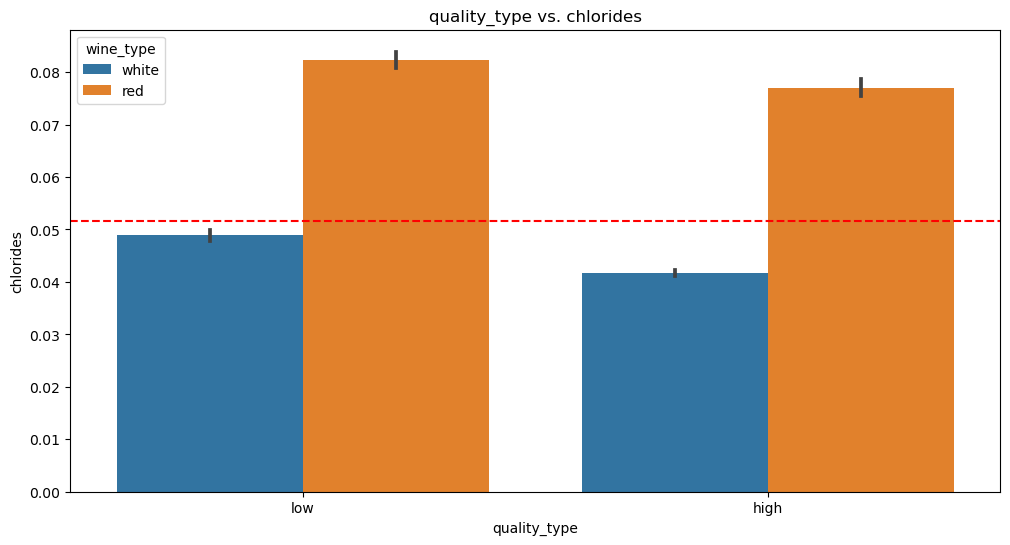

In [30]:
cat_var = 'quality_type'
cont_var = ['chlorides']
hue='wine_type'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [31]:
statistical_tests_cont_cat(train.chlorides,train.quality_type)

T-Test Results:
Test Statistic: 14.560216648188234
P-Value: 1.0880925145274611e-46
We reject the null hypothesis.


# Clustering

- Features to be use: alcohol, chlorides, residual sugar and density.

In [104]:
X=x_train_scaled[['alcohol','red_wine','residual_sugar']]


In [105]:
y_train.value_counts()

high    2282
low     1269
Name: quality_type, dtype: int64

In [106]:
from sklearn.cluster import KMeans

def elbow_method(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    # Plot the WCSS values
    plt.plot(range(1, max_k+1), wcss)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()


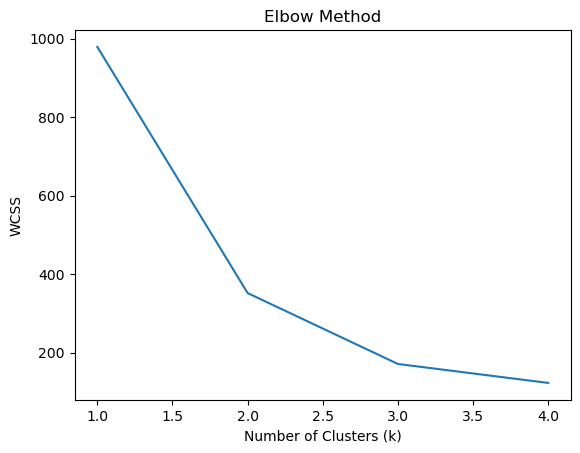

In [107]:
elbow_method(X,4)

In [108]:
def calculate_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    
    # Create a new DataFrame with the cluster labels
    df = pd.DataFrame(data)
    df['cluster'] = kmeans.labels_
    
    return df

In [109]:
clusters=calculate_kmeans(X,3)
clusters

alcohol  red_wine  residual_sugar  cluster
0     0.194690       0.0        0.032000        0
1     0.778761       0.0        0.288000        0
2     0.460177       0.0        0.336000        0
3     0.318584       0.0        0.133333        0
4     0.230088       0.0        0.400000        2
...        ...       ...             ...      ...
3546  0.141593       0.0        0.656000        2
3547  0.194690       0.0        0.058667        0
3548  0.530973       0.0        0.080000        0
3549  0.424779       0.0        0.112000        0
3550  0.353982       0.0        0.122667        0

[3551 rows x 4 columns]

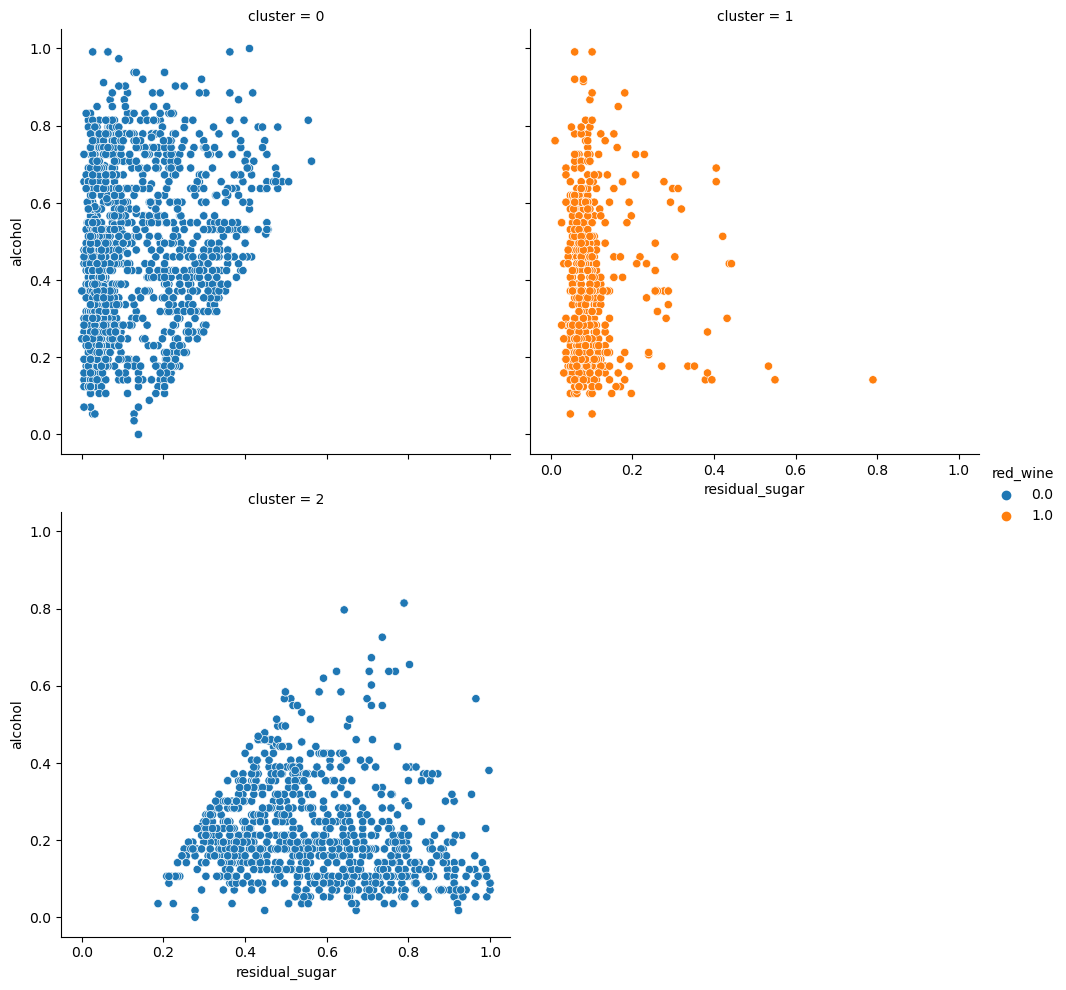

In [110]:
sns.relplot(data=clusters,
           x='residual_sugar',
           y='alcohol',
           hue='red_wine',
           col='cluster',
           col_wrap=2)
plt.show()

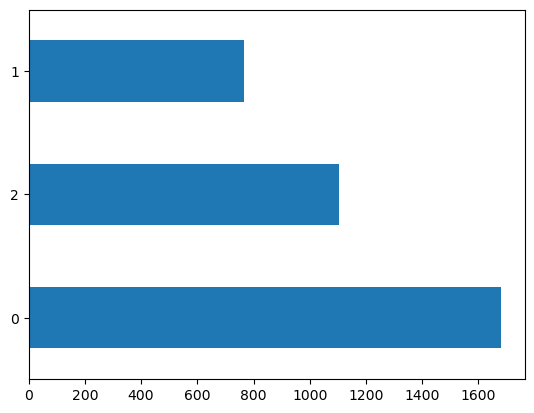

In [111]:
X.cluster.value_counts().plot.barh();

In [112]:
X=x_train_scaled[['alcohol','chlorides','residual_sugar']]

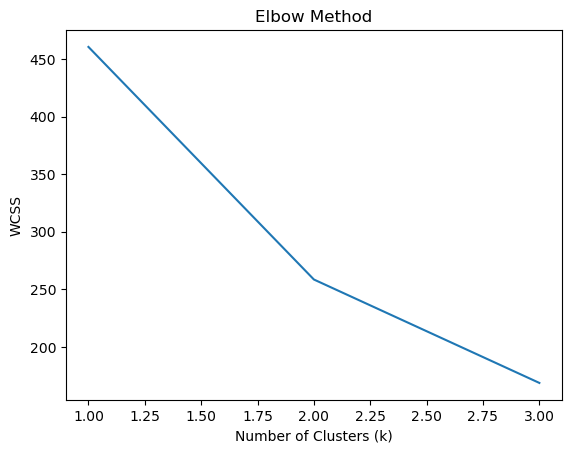

In [113]:
elbow_method(X,3)

In [114]:
clusters=calculate_kmeans(X,3)
clusters

alcohol  chlorides  residual_sugar  cluster
0     0.194690   0.200000        0.032000        0
1     0.778761   0.125926        0.288000        1
2     0.460177   0.177778        0.336000        1
3     0.318584   0.281481        0.133333        0
4     0.230088   0.318519        0.400000        2
...        ...        ...             ...      ...
3546  0.141593   0.259259        0.656000        2
3547  0.194690   0.207407        0.058667        0
3548  0.530973   0.222222        0.080000        1
3549  0.424779   0.222222        0.112000        1
3550  0.353982   0.311111        0.122667        0

[3551 rows x 4 columns]

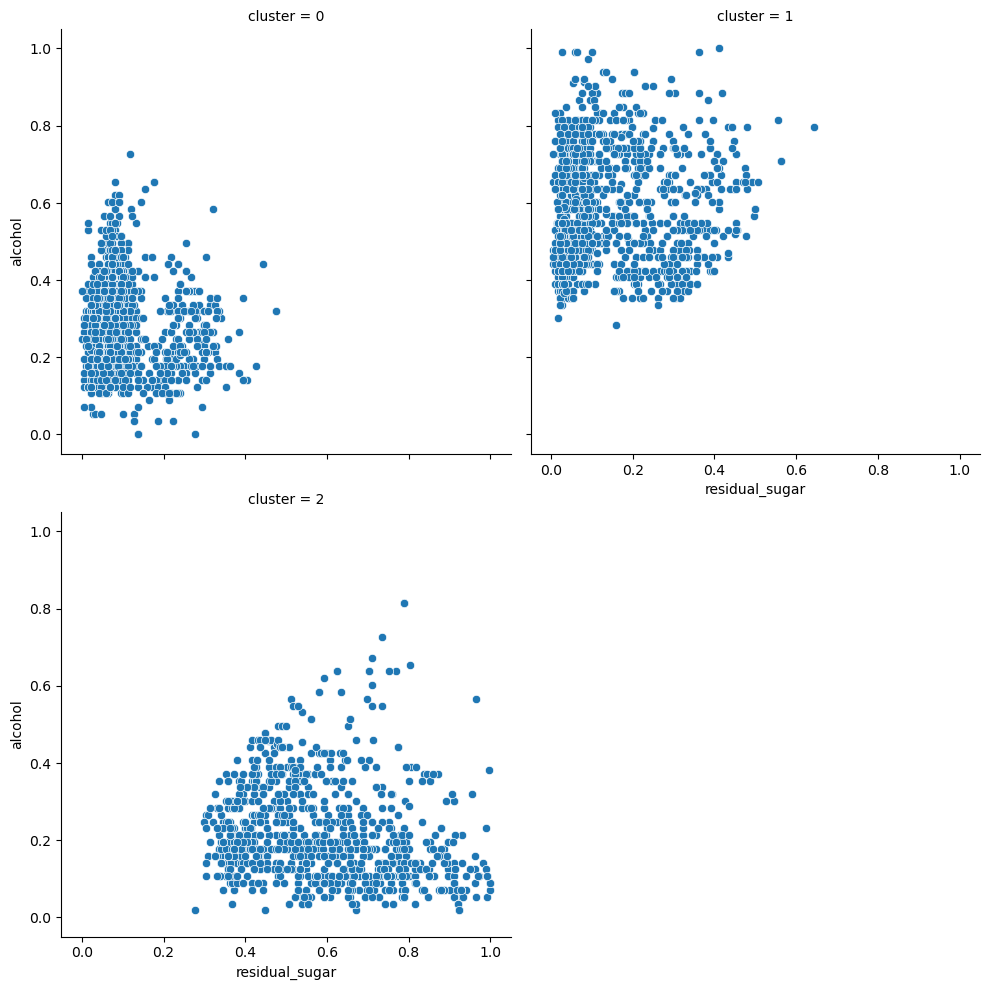

In [115]:
sns.relplot(data=clusters,
           x='residual_sugar',
           y='alcohol',
           col='cluster',
           col_wrap=2)
plt.show()

In [116]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def visualize_clusters(data, x, y, cluster_labels, hue):
    "This function creates a scatter plot to visualize different clusters using Plotly."
    
    # Create subplots with one subplot per cluster
    fig = make_subplots(rows=2, cols=2, subplot_titles=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    
    # Iterate over each unique cluster label
    for cluster in cluster_labels.unique():
        # Filter data for the current cluster
        cluster_data = data[cluster_labels == cluster]
        
        # Add scatter trace for the current cluster
        fig.add_trace(
            go.Scatter(
                x=cluster_data[x],
                y=cluster_data[y],
                mode='markers',
                marker=dict(color=cluster_data[hue], colorscale='Viridis'),
                showlegend=True,
                name='Cluster ' + str(cluster)
            ),
            row=(cluster // 2) + 1,
            col=(cluster % 2) + 1
        )
    
    # Update layout
    fig.update_layout(height=600, width=800, title='Cluster Visualization')
    fig.update_xaxes(title_text=x, row=2, col=1)
    fig.update_yaxes(title_text=y, row=1, col=1)
    
    # Show the plot
    fig.show()





In [117]:
visualize_clusters(clusters,'alcohol','residual_sugar',clusters.cluster,'chlorides')

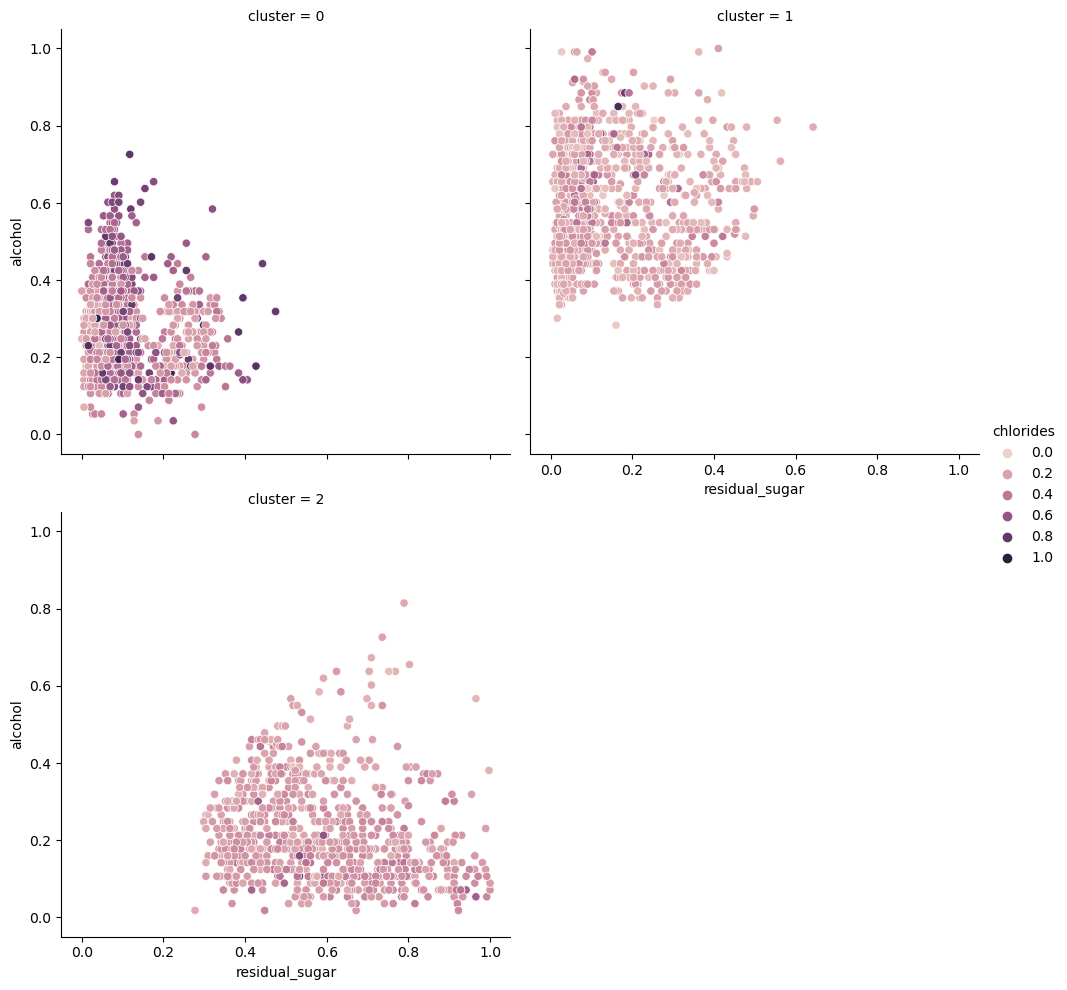

In [123]:
sns.relplot(data=clusters,
           x='residual_sugar',
           y='alcohol',
           hue='chlorides',
           col='cluster',
           col_wrap=2)
plt.show()

## Clusterting adding the target variable 

In [118]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1961            9.5              0.21         0.47             1.3      0.039   
3624            6.6              0.36         0.28             6.1      0.029   
216             7.5              0.27         0.36             7.0      0.036   
657             7.3              0.34         0.21             3.2      0.050   
1571            7.4              0.30         0.49             8.2      0.055   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
1961                 21.0                 123.0  0.99590  2.90       0.64   
3624                 12.0                  93.0  0.99054  3.19       0.27   
216                  45.0                 164.0  0.99390  3.03       0.33   
657                  14.0                 136.0  0.99360  3.25       0.44   
1571                 49.0                 188.0  0.99740  3.52       0.58   

      alcohol  quality  red_wine wine_type quality_type  
1961      9.5        5         0     white          low  
3624     12.8        7         0     white         high  
216      11.0        5         0     white          low  
657      10.2        5         0     white          low  
1571      9.7        6         0     white         high

In [119]:
x_train= train[['quality','residual_sugar','alcohol']]

In [120]:
def minmax_scale_data(X_train):
    # Initialize MinMaxScaler object
    scaler = MinMaxScaler()
    
    # Fit scaler object to training data
    scaler.fit(X_train)
    
    # Transform training data
    X_train_scaled = scaler.transform(X_train)
    
    # Convert scaled data to DataFrame
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    # Return scaled data as a DataFrame
    return X_train_scaled_df

In [121]:
x_train_s=minmax_scale_data(x_train)
x_train_s

quality  residual_sugar   alcohol
0        0.25        0.032000  0.194690
1        0.75        0.288000  0.778761
2        0.25        0.336000  0.460177
3        0.25        0.133333  0.318584
4        0.50        0.400000  0.230088
...       ...             ...       ...
3546     0.50        0.656000  0.141593
3547     0.50        0.058667  0.194690
3548     0.25        0.080000  0.530973
3549     0.50        0.112000  0.424779
3550     0.50        0.122667  0.353982

[3551 rows x 3 columns]

In [122]:
t_clusters=calculate_kmeans(x_train_s,4)
t_clusters

quality  residual_sugar   alcohol  cluster
0        0.25        0.032000  0.194690        0
1        0.75        0.288000  0.778761        1
2        0.25        0.336000  0.460177        0
3        0.25        0.133333  0.318584        0
4        0.50        0.400000  0.230088        2
...       ...             ...       ...      ...
3546     0.50        0.656000  0.141593        2
3547     0.50        0.058667  0.194690        3
3548     0.25        0.080000  0.530973        0
3549     0.50        0.112000  0.424779        3
3550     0.50        0.122667  0.353982        3

[3551 rows x 4 columns]

In [103]:
visualize_clusters(t_clusters,'alcohol','residual_sugar',t_clusters.cluster,'quality')

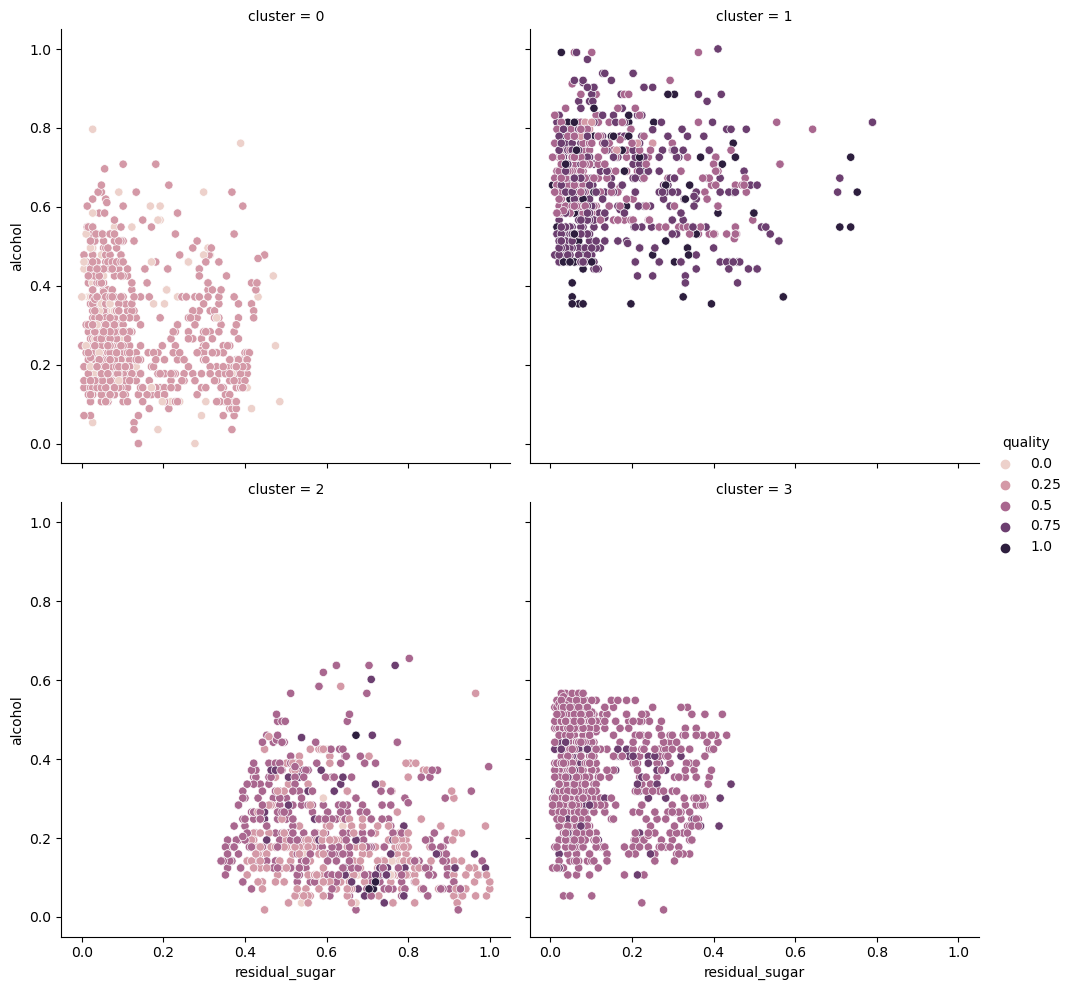

In [124]:
sns.relplot(data=t_clusters,
           x='residual_sugar',
           y='alcohol',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## Clustering with just red wine information

In [89]:
train_red_wine.head(2)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
284            9.9             0.590         0.07             3.4      0.102   
257            6.6             0.695         0.00             2.1      0.075   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
284                 32.0                  71.0  1.00015  3.31       0.71   
257                 12.0                  56.0  0.99680  3.49       0.67   

     alcohol  quality  red_wine wine_type quality_type  
284      9.8        5         1       red          low  
257      9.2        5         1       red          low

In [91]:
x_red_train= train_red_wine[['quality','residual_sugar','alcohol']]

In [93]:
x_red_train_s=minmax_scale_data(x_red_train)

In [126]:
red_cluster=calculate_kmeans(x_red_train_s,2)
red_cluster.head(2)

quality  residual_sugar   alcohol  cluster
0     0.25        0.171233  0.207547        1
1     0.25        0.082192  0.094340        1

In [127]:
visualize_clusters(red_cluster,'alcohol','residual_sugar',red_cluster.cluster)

TypeError: visualize_clusters() missing 1 required positional argument: 'hue'

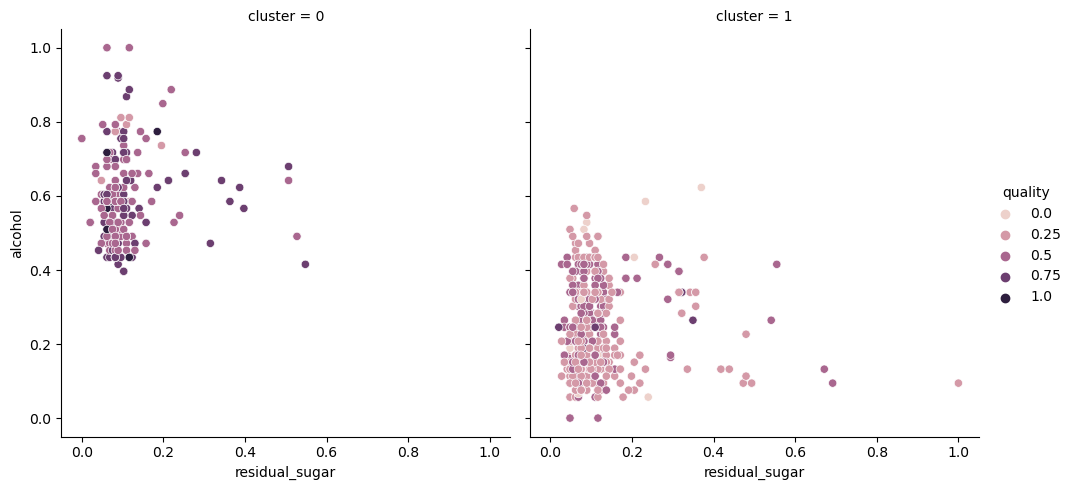

In [128]:
sns.relplot(data=red_cluster,
           x='residual_sugar',
           y='alcohol',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## DBSCAN Clustering 

In [46]:
import pandas as pd
from sklearn.cluster import DBSCAN

def dbscan_clustering(data, epsilon, min_samples):
    "This function performs DBSCAN clustering and adds the cluster labels as a new column in the DataFrame."
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(data)
    
    # Add cluster labels as a new column
    data['cluster'] = cluster_labels
    
    return data


In [47]:
db_clusters=dbscan_clustering(X,10,10)

In [48]:
db_clusters

alcohol  chlorides  residual_sugar  cluster
0     0.194690   0.200000        0.032000        0
1     0.778761   0.125926        0.288000        0
2     0.460177   0.177778        0.336000        0
3     0.318584   0.281481        0.133333        0
4     0.230088   0.318519        0.400000        0
...        ...        ...             ...      ...
3546  0.141593   0.259259        0.656000        0
3547  0.194690   0.207407        0.058667        0
3548  0.530973   0.222222        0.080000        0
3549  0.424779   0.222222        0.112000        0
3550  0.353982   0.311111        0.122667        0

[3551 rows x 4 columns]

In [49]:
visualize_clusters(db_clusters,'alcohol','residual_sugar',db_clusters.cluster)

## Clustering with target variable and total sulfur dioxide

In [129]:
x_train_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.761194          0.173333     0.643836        0.032000   0.200000   
1          0.328358          0.373333     0.383562        0.288000   0.125926   
2          0.462687          0.253333     0.493151        0.336000   0.177778   
3          0.432836          0.346667     0.287671        0.133333   0.281481   
4          0.447761          0.293333     0.671233        0.400000   0.318519   
...             ...               ...          ...             ...        ...   
3546       0.283582          0.626667     0.616438        0.656000   0.259259   
3547       0.626866          0.133333     0.493151        0.058667   0.207407   
3548       0.388060          0.293333     0.383562        0.080000   0.222222   
3549       0.253731          0.306667     0.465753        0.112000   0.222222   
3550       0.328358          0.226667     0.465753        0.122667   0.311111   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0                0.243902              0.428044  0.566904  0.122222   
1                0.134146              0.317343  0.220427  0.444444   
2                0.536585              0.579336  0.437621  0.266667   
3                0.158537              0.476015  0.418229  0.511111   
4                0.585366              0.667897  0.663866  0.811111   
...                   ...                   ...       ...       ...   
3546             0.390244              0.645756  0.663866  0.455556   
3547             0.280488              0.664207  0.547511  0.511111   
3548             0.243902              0.627306  0.292825  0.455556   
3549             0.713415              0.571956  0.301228  0.533333   
3550             0.256098              0.494465  0.404008  0.522222   

      sulphates   alcohol  red_wine  
0      0.583333  0.194690       0.0  
1      0.069444  0.778761       0.0  
2      0.152778  0.460177       0.0  
3      0.305556  0.318584       0.0  
4      0.500000  0.230088       0.0  
...         ...       ...       ...  
3546   0.333333  0.141593       0.0  
3547   0.458333  0.194690       0.0  
3548   0.486111  0.530973       0.0  
3549   0.347222  0.424779       0.0  
3550   0.347222  0.353982       0.0  

[3551 rows x 12 columns]

In [132]:
x_train= train[['quality','residual_sugar','alcohol']]

In [133]:
x_scaled_s=minmax_scale_data(x_train)

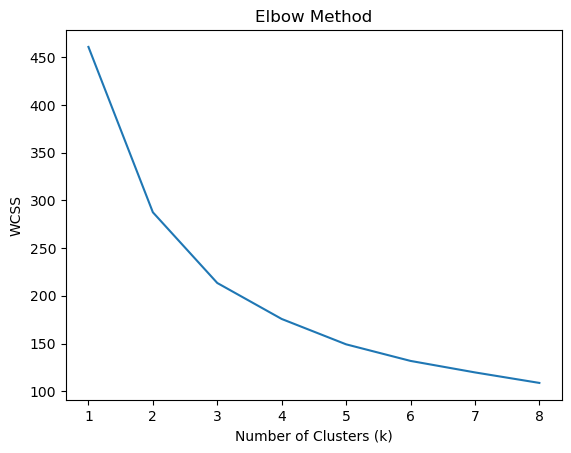

In [135]:
elbow_method(x_scaled_s,8)

In [139]:
s_clusters=calculate_kmeans(x_scaled_s,3)

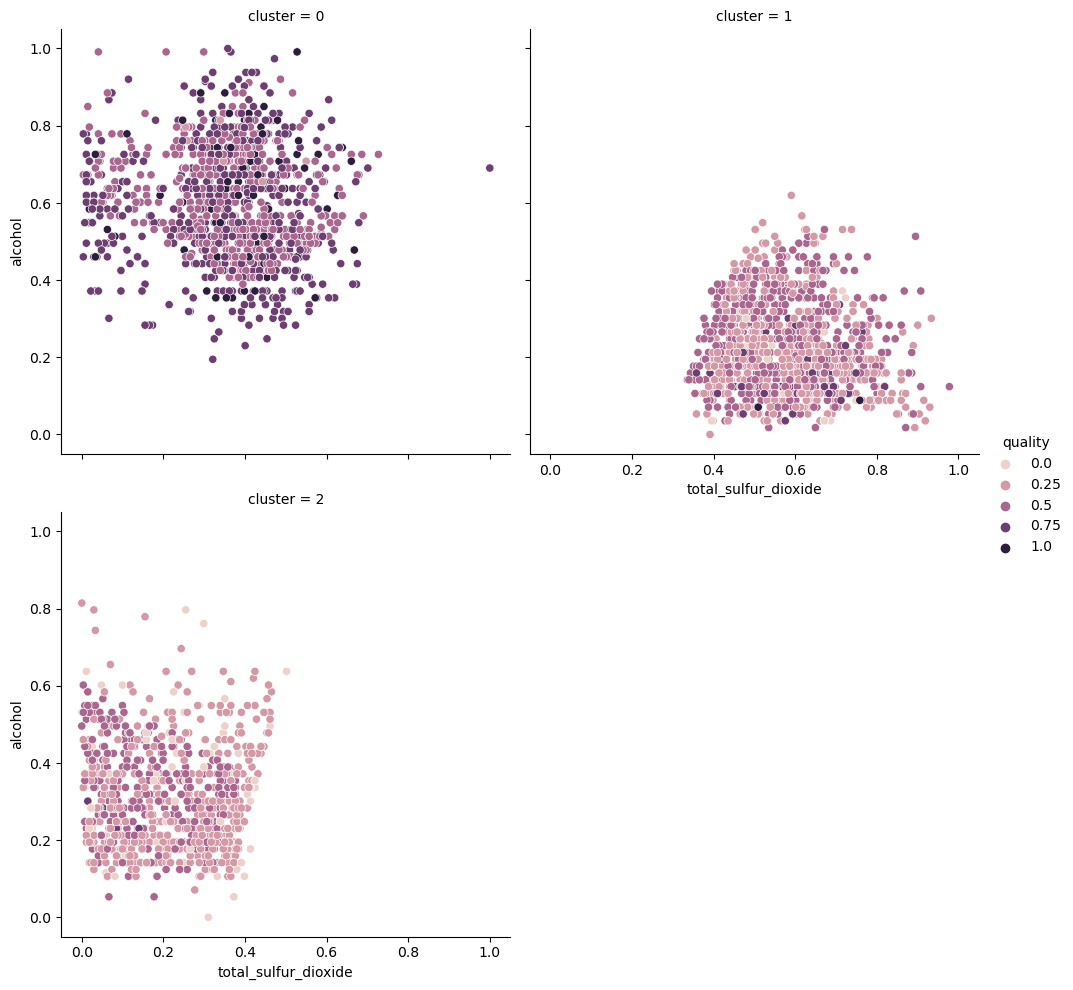

In [141]:
sns.relplot(data=s_clusters,
           x='total_sulfur_dioxide',
           y='alcohol',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## Clustering with total sulfur dioxide, chloride and target variable

In [142]:
x_train= train[['quality','total_sulfur_dioxide','chlorides']]

In [144]:
x_scaled_c=minmax_scale_data(x_train)

In [147]:
c_cluster=calculate_kmeans(x_scaled_c,3)

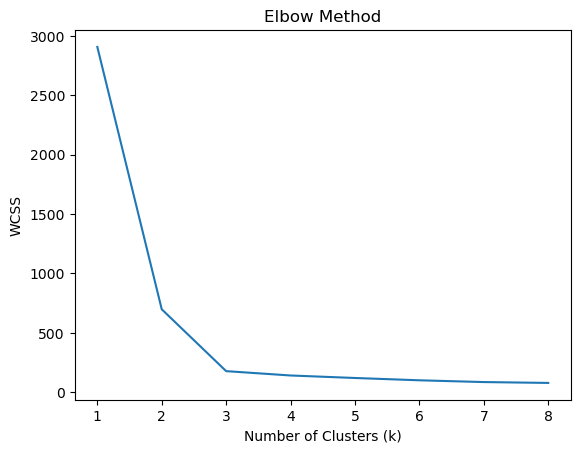

In [146]:
elbow_method(x_scaled_c,8)

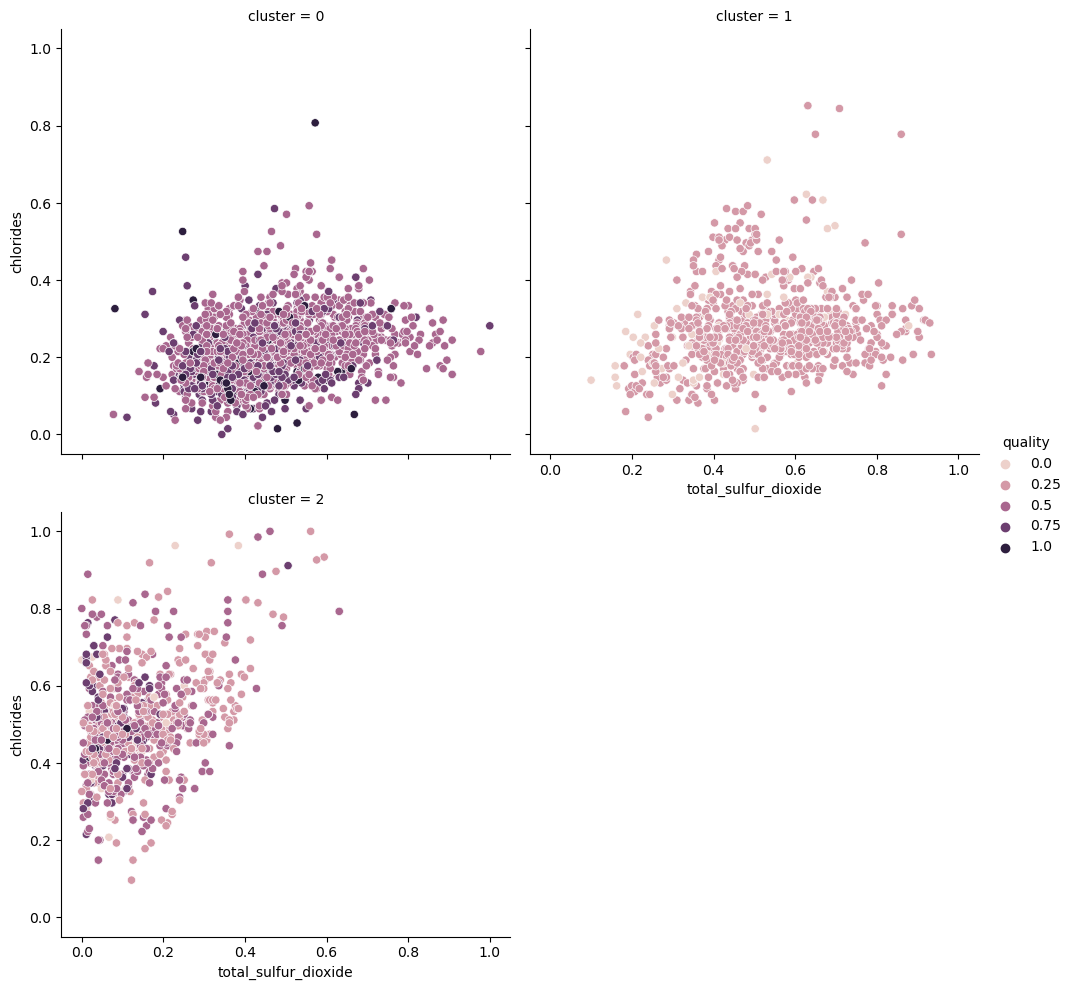

In [148]:
sns.relplot(data=c_cluster,
           x='total_sulfur_dioxide',
           y='chlorides',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## Creating a clustering utilizing residual alcohol and total sulfur dioxide as a new "feaure" column. and comparing it against chlorides

In [149]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1961            9.5              0.21         0.47             1.3      0.039   
3624            6.6              0.36         0.28             6.1      0.029   
216             7.5              0.27         0.36             7.0      0.036   
657             7.3              0.34         0.21             3.2      0.050   
1571            7.4              0.30         0.49             8.2      0.055   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
1961                 21.0                 123.0  0.99590  2.90       0.64   
3624                 12.0                  93.0  0.99054  3.19       0.27   
216                  45.0                 164.0  0.99390  3.03       0.33   
657                  14.0                 136.0  0.99360  3.25       0.44   
1571                 49.0                 188.0  0.99740  3.52       0.58   

      alcohol  quality  red_wine wine_type quality_type  
1961      9.5        5         0     white          low  
3624     12.8        7         0     white         high  
216      11.0        5         0     white          low  
657      10.2        5         0     white          low  
1571      9.7        6         0     white         high

In [172]:
X_train=train[['chlorides','density','quality']]

In [173]:
X_Train_Scaled=minmax_scale_data(X_train)

In [174]:
X_Train_Scaled['cluster'] = s_clusters.cluster.map({
    0:'high',
    1:'medium',
    2:'low'
})

In [175]:
X_Train_Scaled

chlorides   density  quality cluster
0      0.200000  0.566904     0.25  medium
1      0.125926  0.220427     0.75    high
2      0.177778  0.437621     0.25  medium
3      0.281481  0.418229     0.25  medium
4      0.318519  0.663866     0.50  medium
...         ...       ...      ...     ...
3546   0.259259  0.663866     0.50  medium
3547   0.207407  0.547511     0.50  medium
3548   0.222222  0.292825     0.25  medium
3549   0.222222  0.301228     0.50  medium
3550   0.311111  0.404008     0.50  medium

[3551 rows x 4 columns]

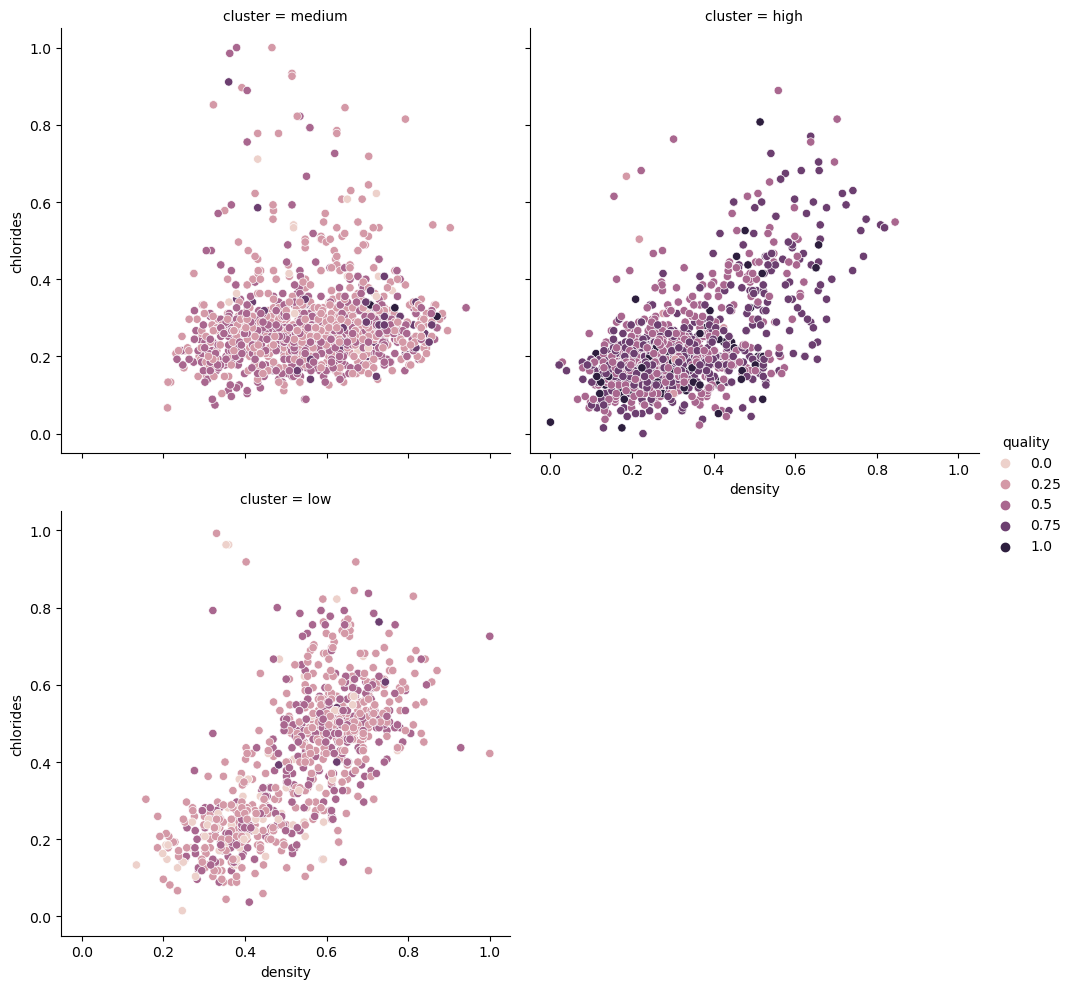

In [176]:
sns.relplot(data=X_Train_Scaled,
           x='density',
           y='chlorides',
            hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

# MODELING:

In [183]:
x_train=train[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides']]
y_train=train.quality_type
x_validate=validate[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides']]
y_validate=validate.quality_type
x_test=test[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides']]
y_test=test.quality_type

In [185]:
def minmax_scale_data(X_train, X_validate,X_test):
    # Initialize MinMaxScaler object
    scaler = MinMaxScaler()
    
    # Fit scaler object to training data
    scaler.fit(X_train)
    
    # Transform training and validation data
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled=scaler.transform(X_test)
    
    # Return scaled data
    return X_train_scaled, X_validate_scaled,X_test_scaled

In [187]:
x_train_scaled,x_validate_scaled,x_test_scaled=minmax_scale_data(x_train,x_validate,x_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [188]:
y_train.value_counts()

high    2282
low     1269
Name: quality_type, dtype: int64

In [189]:
def create_pie_chart(df, column_name,title):
    values = df[column_name].value_counts()
    labels = values.index.tolist()
    sizes = values.tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

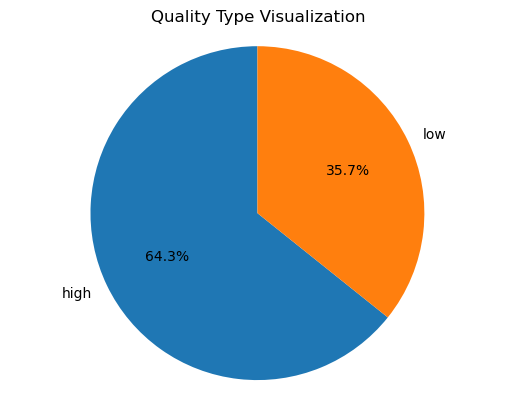

In [190]:
create_pie_chart(train,'quality_type','Quality Type Visualization')

In [191]:
# DECISION TREE
import pandas as pd

def fit_DT_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a decision tree model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score of 70% or higher on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for depth in range(1, 21):
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.80:
            results.append((model, score))
    
    results.sort(key=lambda x: x[1], reverse=True)
    best_models = [result[0] for result in results[:5]]
    best_scores = [result[1] for result in results[:5]]
    top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
    
    return best_models[0], top_models_df



In [199]:
fit_DT_random_features(X,y_train,4)

(DecisionTreeClassifier(max_depth=16),
                                   Model     Score
 0  DecisionTreeClassifier(max_depth=16)  0.798085
 1  DecisionTreeClassifier(max_depth=13)  0.793016
 2  DecisionTreeClassifier(max_depth=12)  0.732188
 3  DecisionTreeClassifier(max_depth=14)  0.729935
 4  DecisionTreeClassifier(max_depth=11)  0.711912)

In [193]:


def fit_KNN_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a K-Nearest Neighbors model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score of 70% or higher on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for n_neighbors in range(1, 21):
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.80:
            results.append((model, score))
    
    results.sort(key=lambda x: x[1], reverse=True)
    best_models = [result[0] for result in results[:5]]
    best_scores = [result[1] for result in results[:5]]
    top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
    
    return best_models[0], top_models_df


def fit_RF_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a Random Forest model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score between 0.68 and 0.95 on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for n_estimators in range(10, 201, 10):
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = RandomForestClassifier(n_estimators=n_estimators)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.99:
            results.append((model, score))

    results.sort(key=lambda x: x[1], reverse=True)
    if results:
        best_models = [result[0] for result in results[:5]]
        best_scores = [result[1] for result in results[:5]]
        top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
        return best_models[0], top_models_df
    else:
        return None, None




In [57]:
fit_KNN_random_features(X,y_train,3)

(KNeighborsClassifier(n_neighbors=2),
                                   Model     Score
 0   KNeighborsClassifier(n_neighbors=2)  0.781752
 1   KNeighborsClassifier(n_neighbors=3)  0.763729
 2   KNeighborsClassifier(n_neighbors=9)  0.743734
 3  KNeighborsClassifier(n_neighbors=13)  0.722050
 4  KNeighborsClassifier(n_neighbors=17)  0.722050)

In [194]:
fit_KNN_random_features(X,y_train,4)

(KNeighborsClassifier(n_neighbors=3),
                                  Model     Score
 0  KNeighborsClassifier(n_neighbors=3)  0.776119
 1  KNeighborsClassifier(n_neighbors=2)  0.770206
 2  KNeighborsClassifier(n_neighbors=4)  0.724866
 3               KNeighborsClassifier()  0.715855
 4  KNeighborsClassifier(n_neighbors=6)  0.695015)

In [195]:
fit_RF_random_features(X,y_train,3)

(RandomForestClassifier(n_estimators=10),
                                                Model     Score
 0  (DecisionTreeClassifier(max_features='auto', r...  0.974092)

In [196]:
fit_RF_random_features(X,y_train,2)

(RandomForestClassifier(n_estimators=10),
                                                Model     Score
 0  (DecisionTreeClassifier(max_features='auto', r...  0.972402)

In [197]:
def fit_LR_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a Logistic Regression model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score between 0.68 and 0.80 on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for C in [0.001, 0.01, 0.1, 1.0, 10.0]:
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = LogisticRegression(C=C)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.80:
            results.append((model, score))
    
    results.sort(key=lambda x: x[1], reverse=True)
    best_models = [result[0] for result in results[:5]]
    best_scores = [result[1] for result in results[:5]]
    top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
    
    return best_models[0], top_models_df




In [198]:
fit_LR_random_features(X,y_train,3)

(LogisticRegression(C=0.1),
                        Model     Score
 0  LogisticRegression(C=0.1)  0.681498)

# Testing on Validate and Test:

- Decision Tree Classifier: 13 and 15 max_depth
- KN Neighbors: 2 and 3 neighbors

In [208]:
from sklearn.metrics import accuracy_score
def run_decision_tree(X_train, X_test, y_train, y_test, max_depth):
    # Create a Decision Tree classifier
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    # Train the classifier on the training data
    dt.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = dt.predict(X_test)
    
    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

### Decision Tree max depth 16
- Results with train data : .7981

In [209]:
run_decision_tree(x_train, x_validate, y_train, y_validate, 16)

0.714527027027027

In [210]:
run_decision_tree(x_train, x_test, y_train, y_test, 16)

0.7449324324324325

### Decision Tree max depth 13
- Results with train data: .7930

In [211]:
run_decision_tree(x_train, x_validate, y_train, y_validate, 13)

0.71875

In [212]:
run_decision_tree(x_train, x_test, y_train, y_test, 13)

0.7415540540540541

In [213]:
def run_knn(X_train, X_test, y_train, y_test, n_neighbors):
    # Create a K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = knn.predict(X_test)
    
    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

### KNN 3 n_neighbors
- Results with train data: .7761

In [214]:
run_knn(x_train,x_validate,y_train,y_validate,3)

0.6798986486486487

In [215]:
run_knn(x_train,x_test,y_train,y_test,3)

0.6984797297297297

### KNN 2 n_neighbors
- Results with train data: .7702

In [216]:
run_knn(x_train,x_validate,y_train,y_validate,2)

0.6934121621621622

In [217]:
run_knn(x_train,x_test,y_train,y_test,3)

0.6984797297297297